# (2017-fordgobike-tripdata)
## by (Wessam Hamdy)

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

In [2]:
#read data
df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [4]:
df.duplicated().sum()

0

## no null or duplicated values, we just need to change some types of the columns

In [5]:
#make a copy of the dataset
df_new = df.copy()

In [6]:
#fix columns data types
df_new['start_time'] = pd.to_datetime(df_new['start_time'])
df_new['end_time'] = pd.to_datetime(df_new['end_time'])

df_new['start_station_id'] = df_new['start_station_id'].astype('str')
df_new['end_station_id'] = df_new['end_station_id'].astype('str')
df_new['bike_id'] = df_new['bike_id'].astype('str')

df_new['user_type'] = df_new['user_type'].astype('category')
df_new.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
dtype: object

In [7]:
#make new columns
#extract the date in year-month-day
df_new['start_date'] = df_new['start_time'].dt.date
df_new['end_date'] = df_new['end_time'].dt.date
#extract the start and end hour
df_new['start_hour'] = df_new['start_time'].dt.hour
df_new['end_hour'] = df_new['end_time'].dt.hour
#extract the start and the end day of the week
df_new['start_day_week'] = df_new['start_time'].dt.day_name()
df_new['end_day_week'] = df_new['end_time'].dt.day_name()
#extract the start and the end day of the month
df_new['start_day_month'] = df_new['start_time'].dt.day
df_new['end_day_month'] = df_new['end_time'].dt.day
#extract the start and the end month
df_new['start_month'] = df_new['start_time'].dt.month_name()
df_new['end_month'] = df_new['end_time'].dt.month_name()
#make a new column duration in min
df_new['duration_min'] = np.round(df_new.duration_sec / 60).astype(int)

In [8]:
#drop unused columns
df_new.drop(['duration_sec','start_time','end_time','start_station_id','end_station_id','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], axis = 1, inplace=True)

In [9]:
df_new.dtypes

start_station_name      object
end_station_name        object
bike_id                 object
user_type             category
start_date              object
end_date                object
start_hour               int64
end_hour                 int64
start_day_week          object
end_day_week            object
start_day_month          int64
end_day_month            int64
start_month             object
end_month               object
duration_min             int32
dtype: object

In [10]:
df_new.head()

,start_station_name,end_station_name,bike_id,user_type,start_date,end_date,start_hour,end_hour,start_day_week,end_day_week,start_day_month,end_day_month,start_month,end_month,duration_min
0,Laguna St at Hayes St,San Francisco Public Library (Grove St at Hyde...,96,Customer,2017-12-31,2018-01-01,16,15,Sunday,Monday,31,1,December,January,1335
1,Yerba Buena Center for the Arts (Howard St at ...,Dolores St at 15th St,88,Customer,2017-12-31,2018-01-01,15,13,Sunday,Monday,31,1,December,January,1313
2,Downtown Berkeley BART,Downtown Berkeley BART,1094,Customer,2017-12-31,2018-01-01,22,11,Sunday,Monday,31,1,December,January,763
3,8th St at Ringold St,Powell St BART Station (Market St at 5th St),2831,Customer,2017-12-31,2018-01-01,17,10,Sunday,Monday,31,1,December,January,1036
4,Bancroft Way at Telegraph Ave,Fulton St at Bancroft Way,3167,Subscriber,2017-12-31,2018-01-01,14,2,Sunday,Monday,31,1,December,January,727


### What is the structure of your dataset?

> data has 519700 rows and 13 columns about bike trips

### What is/are the main feature(s) of interest in your dataset?

> the main features of my interest in data are finding the most wanted  and the least time of rides happen, and what is the most popular user type in our data and it's features?, 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start station name, end station name and bike id these are least important columns for me
> user type subscriber or customer, start and end hour, day of the week, day of the month, month and duration of trip in minutes, these columns are the most important

## Univariate Exploration

### What is the duration of most rides?

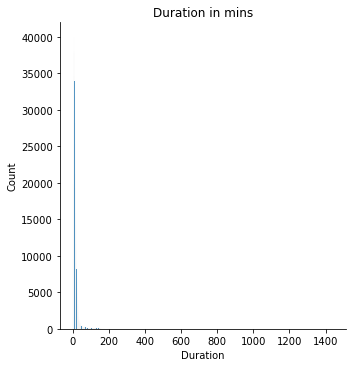

In [11]:
#make histogram to see the distripution
sns.displot(df_new.duration_min);
plt.title('Duration in mins');
plt.xlabel('Duration');

>the graph is too messy we need to change the scale of the data, we can solve it by using standard deviation

C:\Users\wessa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


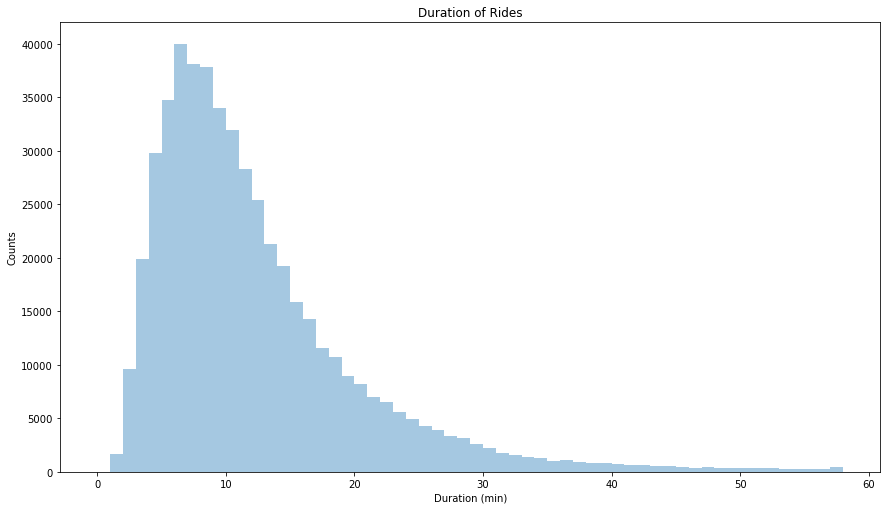

In [12]:
#customize the number of the bins
bins = np.arange(0, df_new.duration_min.std()+1,1)
#size of the chart
plt.figure(figsize=[14.70, 8.27]);
#plot the histogram
sns.distplot(df_new.duration_min, bins=bins, kde=False);
#plot label
plt.title('Duration of Rides');
#y label
plt.ylabel('Counts');
#x label
plt.xlabel('Duration (min)');

> we can notice that the most duration of the trips is 10 mins

> from this chart i think analying the start and end day, hour, month will give the same result, so i will only do my process on start time columns 

### What are the most popular start and end stations?

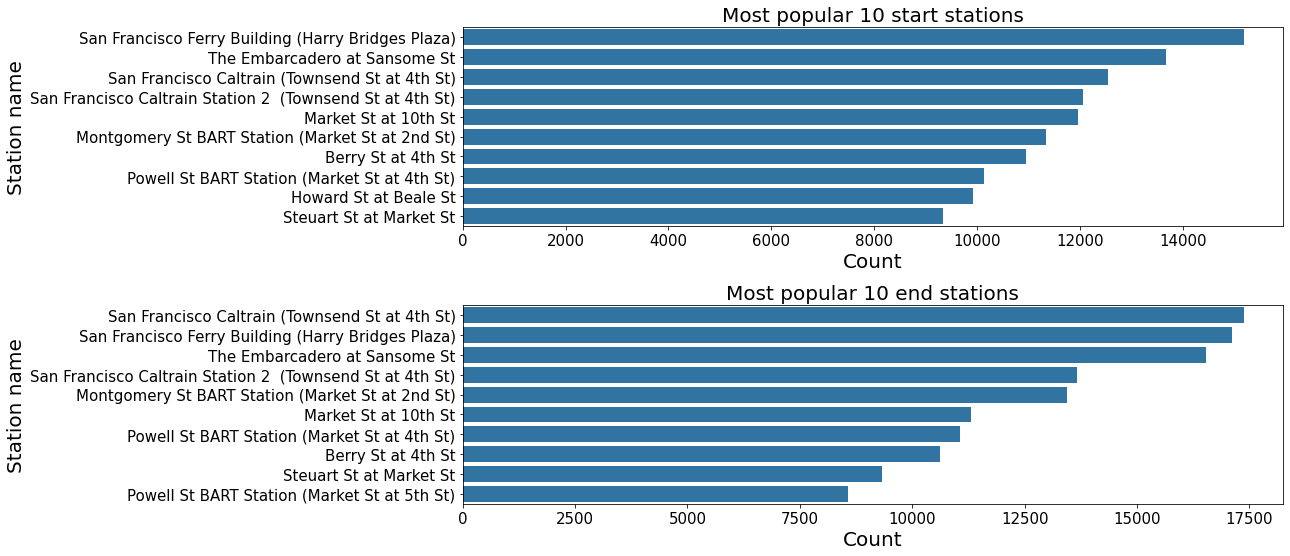

In [13]:
#we will split it into 2 parts start and end graph
#Set a larger figure size for subplots
plt.figure(figsize=[14.70, 8.27]);
# 2 rows, 1 col, subplot 1
plt.subplot(2, 1, 1) 
sns.countplot(data=df_new, y='start_station_name',color=sns.color_palette()[0],order=df_new.start_station_name.value_counts().iloc[:10].index);
#x axis label
plt.xlabel("Count",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Station name",size=20)
plt.yticks(size=15)
#plot label
plt.title("Most popular 10 start stations",size = 20)   

# 2 row, 1 col, subplot 2
plt.subplot(2, 1, 2) 
sns.countplot(data=df_new, y='end_station_name',color=sns.color_palette()[0],order=df_new.end_station_name.value_counts().iloc[:10].index);
#x axis label
plt.xlabel("Count",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Station name",size=20)
plt.yticks(size=15)
#plot label
plt.title("Most popular 10 end stations",size = 20);
plt.subplots_adjust(bottom=0.1,
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

> San Francisco Ferry Building (Harry Bridges Plaza) and The Embarcadero at Sansome St are the most common start station

> San Francisco Caltrain (Townsend St at 4th St) and San Francisco Ferry Building (Harry Bridges Plaza) are the most common end station

### What is the most bike ridden?

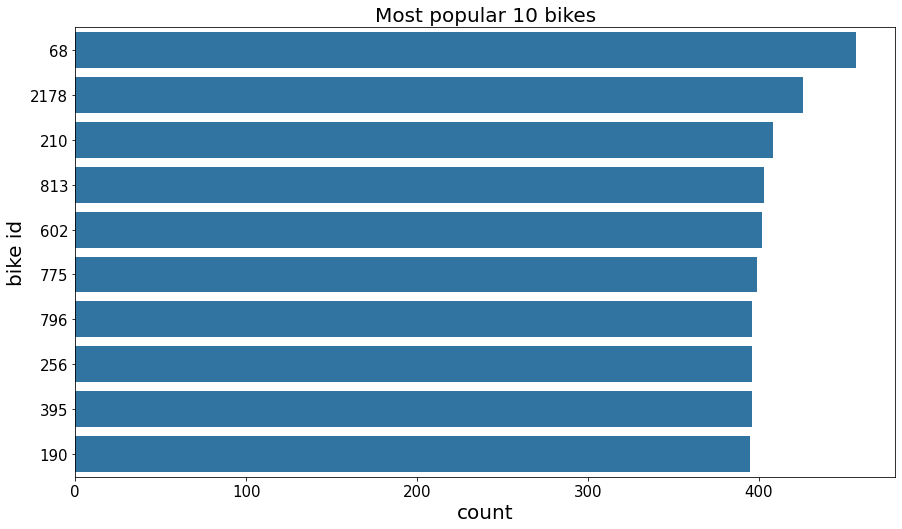

In [14]:
#size of the chart
plt.figure(figsize=[14.70, 8.27]);
sns.countplot(data=df_new, y='bike_id',color=sns.color_palette()[0],order=df_new.bike_id.value_counts().iloc[:10].index);

#x axis label
plt.xlabel("count",size=20)
plt.xticks(size=15)

#y axis label
plt.ylabel("bike id",size=20)
plt.yticks(size=15)

#plot label
plt.title("Most popular 10 bikes",size = 20);

> we can see that bikes with id 68 and 2178 are most in this data

### What is the most common user type?

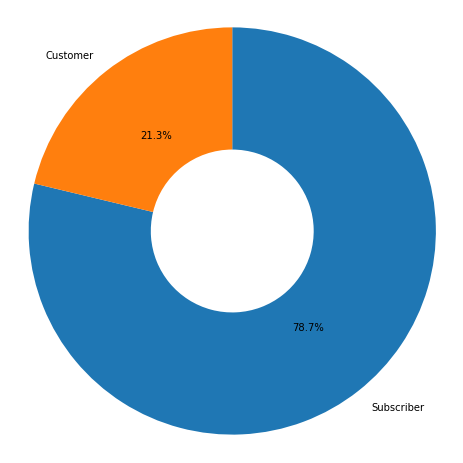

In [15]:
#size of the chart
plt.figure(figsize=[14.70, 8.27]);
plt.pie(df_new['user_type'].value_counts(), labels=df_new['user_type'].value_counts().index, startangle = 90, wedgeprops = {'width' : 0.6}, counterclock = False, autopct='%.1f%%');
plt.axis('square');

>21.3% of the riders are Custmoers while 78.7% are Subscriber.

### What is the most common day?

In [16]:
#change the days into ordered values to sort it
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_category = pd.api.types.CategoricalDtype(ordered=True, categories=week_days)
#apply it on start day
df_new['start_day_week'] = df_new['start_day_week'].astype(week_category)

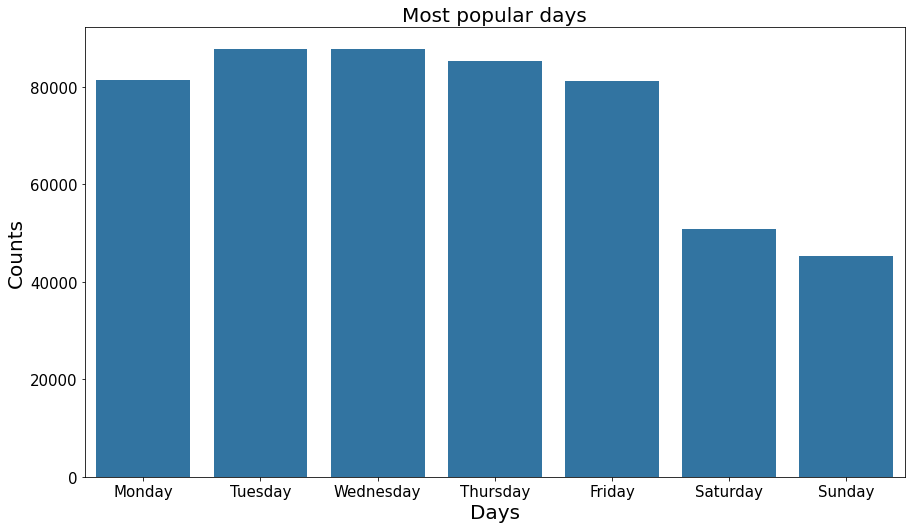

In [17]:
#size of the chart
plt.figure(figsize=[14.70, 8.27]);
#plot a bar chart
sns.countplot(data=df_new, x='start_day_week',color=sns.color_palette()[0]);
#x axis label
plt.xlabel("Days",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Counts",size=20)
plt.yticks(size=15)
#plot label
plt.title("Most popular days",size = 20);

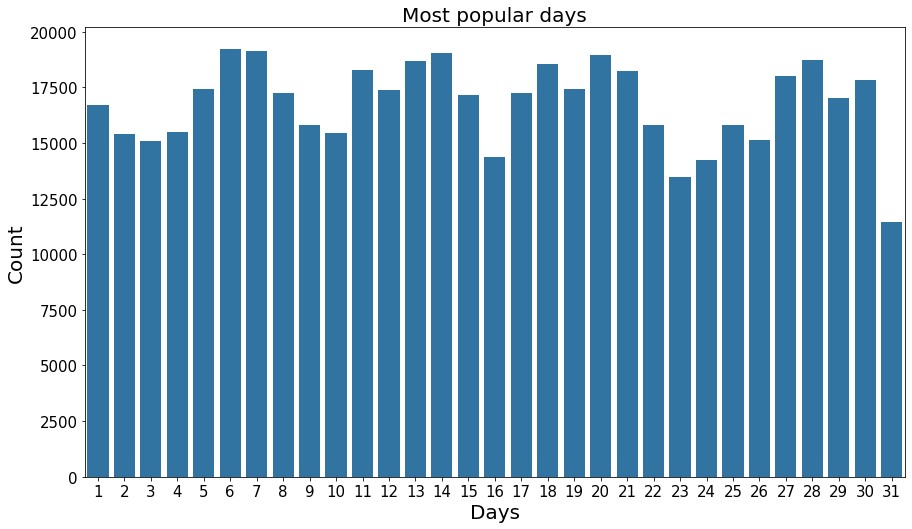

In [18]:
#size of the graph
plt.figure(figsize=[14.70, 8.27]);
#plot a bar chart
sns.countplot(data=df_new, x='start_day_month',color=sns.color_palette()[0]);
#x axis label
plt.xlabel("Days",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Count",size=20)
plt.yticks(size=15)
#plot label
plt.title("Most popular days",size = 20);

>Tuesday and Wednesday are the most common days, while Sunday is the least day

>Day 6 and 7 are the most common too, while 31 and 23 are the least

### What is the most common month?

In [19]:
#make ordered months to sort it
months = ['June', 'July', 'August', 'September', 'October', 'November', 'December']
month_category = pd.api.types.CategoricalDtype(ordered=True, categories=months)
#apply it on start month
df_new['start_month'] = df_new['start_month'].astype(month_category)

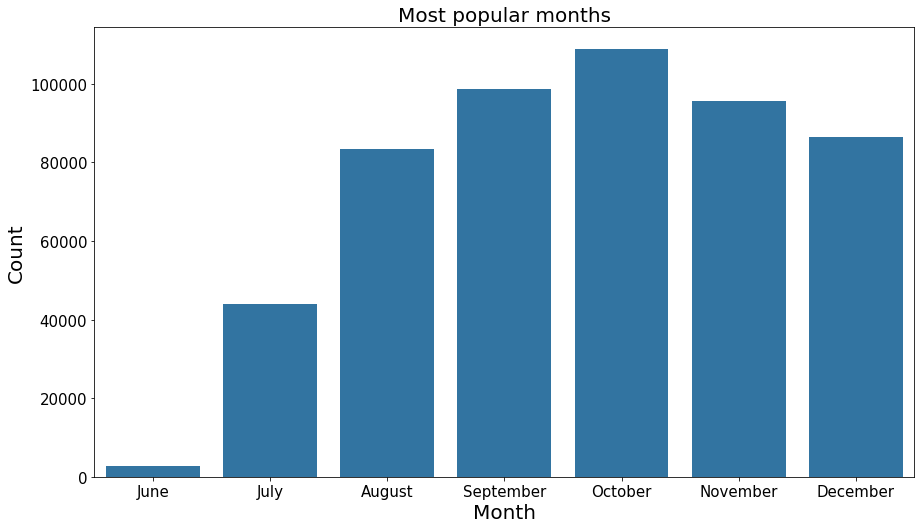

In [20]:
#size of the graph
plt.figure(figsize=[14.70, 8.27]);
#bar chart
sns.countplot(data=df_new, x='start_month',color=sns.color_palette()[0]);
#x axis label
plt.xlabel("Month",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Count",size=20)
plt.yticks(size=15)
#plot label
plt.title("Most popular months",size = 20);

>they do few trips is June, and almost of their trips are in September, October, November

### What is the most common hour?

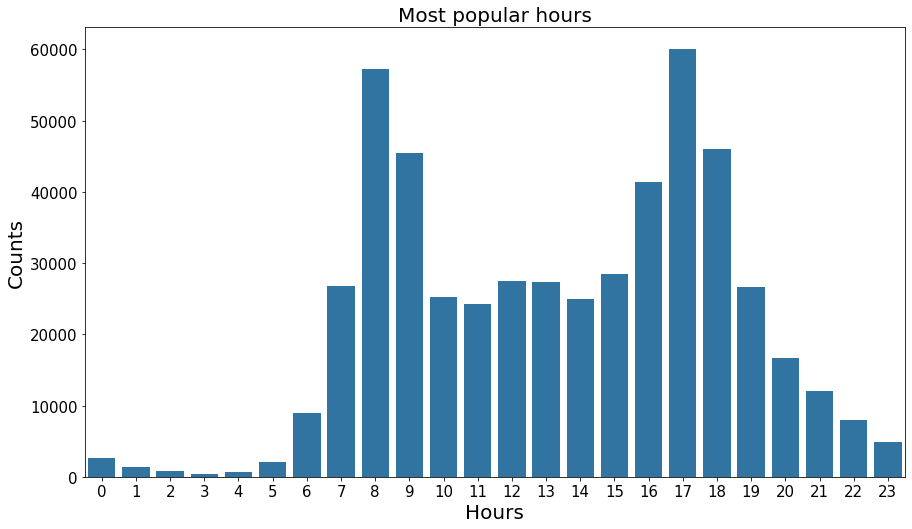

In [21]:
#size of the graph
plt.figure(figsize=[14.70, 8.27]);
#plot a bar chart
sns.countplot(data=df_new, x='start_hour',color=sns.color_palette()[0]);
#x axis label
plt.xlabel("Hours",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Counts",size=20)
plt.yticks(size=15)
#plot label
plt.title("Most popular hours",size = 20);

>8 AM, 5 PM are the most common hours while hours from 12 am to 5 am are the least

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> dataset is fine we just needed to trasnform or change the scale of duration time with standard deviation to fit it will

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> i dropped unnecessary columns which will not be usefull in my analysis, i created new columns from start and end date time, such as hour, day and month, i changed duration into minutes to become more realistic

## Bivariate Exploration

### What is the duration for the most common station?

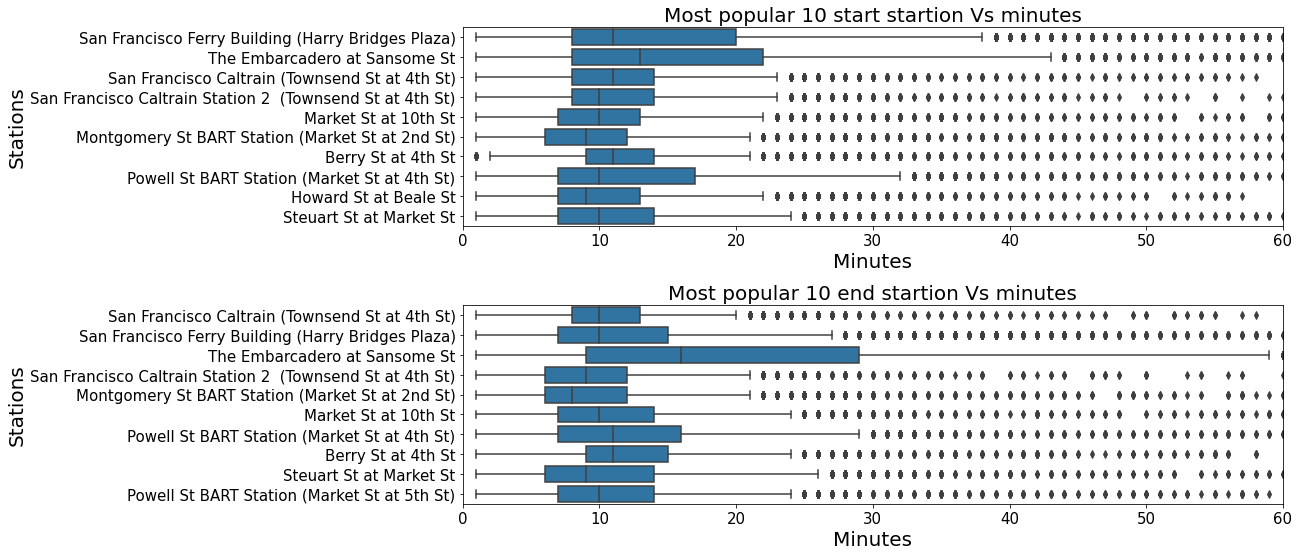

In [22]:
#size of the graph
plt.figure(figsize=[14.70, 8.27]);
#plot number 1
plt.subplot(2,1,1)
#plot a bar chart
sns.boxplot(data=df_new, y='start_station_name',x='duration_min',color=sns.color_palette()[0],order=df_new.start_station_name.value_counts().iloc[:10].index);
#x axis label
plt.xlabel("Minutes",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Stations",size=20)
plt.yticks(size=15)
#plot label
plt.title("Most popular 10 start startion Vs minutes",size = 20);
plt.xlim(0,60);

#plot number 2
plt.subplot(2,1,2)
#plot a bar chart
sns.boxplot(data=df_new, y='end_station_name',x='duration_min',color=sns.color_palette()[0],order=df_new.end_station_name.value_counts().iloc[:10].index);
#x axis label
plt.xlabel("Minutes",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Stations",size=20)
plt.yticks(size=15)
#plot label
plt.title("Most popular 10 end startion Vs minutes",size = 20);
plt.xlim(0,60);
plt.subplots_adjust(bottom=0.1,
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

> we notice that the average for all station around 10, but The Embarcadero at Sansame St is 15

### What is the average duration for every user type?

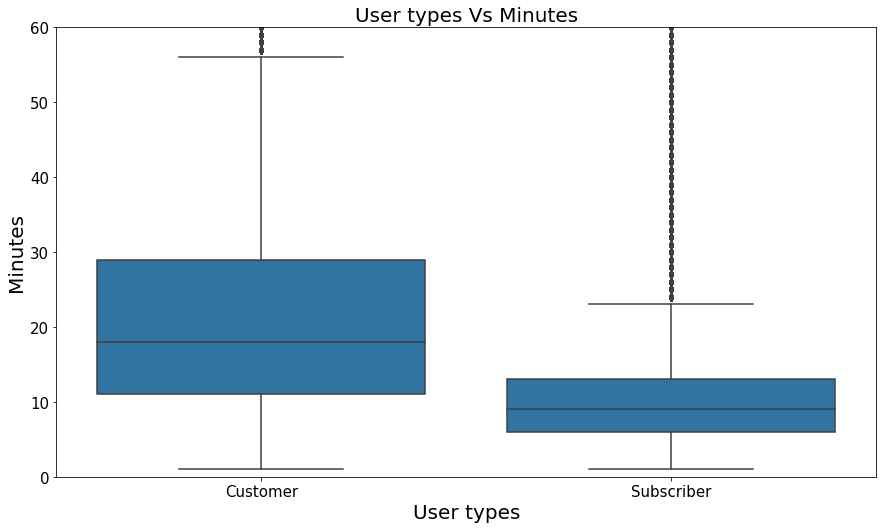

In [23]:
#size of the graph
plt.figure(figsize=[14.70, 8.27]);
#plot a bar chart
sns.boxplot(data=df_new, x='user_type',y='duration_min',color=sns.color_palette()[0]);
#x axis label
plt.xlabel("User types",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Minutes",size=20)
plt.yticks(size=15)
#plot label
plt.title("User types Vs Minutes",size = 20);
plt.ylim(0,60);

> we can notice that the average time which Customers take type is higher than the average of Subscriber

### What is the average duration of each day?

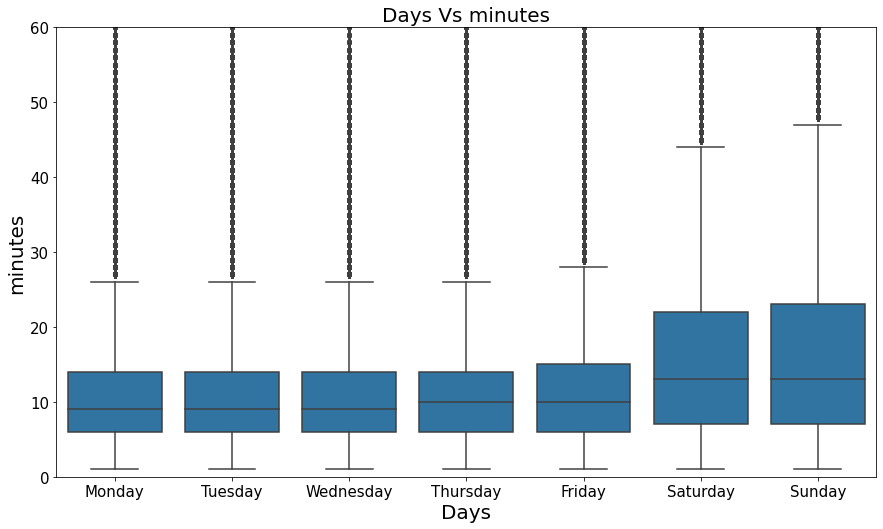

In [24]:
#size of the graph
plt.figure(figsize=[14.70, 8.27]);
#plot a bar chart
sns.boxplot(data=df_new, x='start_day_week',y='duration_min',color=sns.color_palette()[0]);
#x axis label
plt.xlabel("Days",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("minutes",size=20)
plt.yticks(size=15)
#plot label
plt.title("Days Vs minutes",size = 20);
plt.ylim(0,60);

> the average duration of Saturday and Sunday is higher a bit than the others day, but we can say the average of all days is around 10 mintues

# What is the average duration for every month?

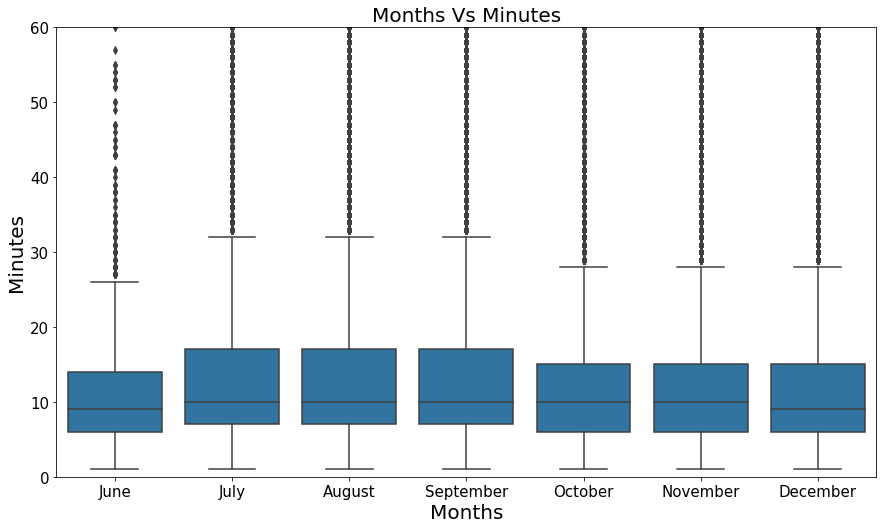

In [25]:
#size of the graph
plt.figure(figsize=[14.70, 8.27]);
#plot a bar chart
sns.boxplot(data=df_new, x='start_month',y='duration_min',color=sns.color_palette()[0]);
#x axis label
plt.xlabel("Months",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Minutes",size=20)
plt.yticks(size=15)
#plot label
plt.title("Months Vs Minutes",size = 20);
plt.ylim(0,60);

> we can say that the average of all months is equal, it is around 10

### What is the frequency of users type per hour?

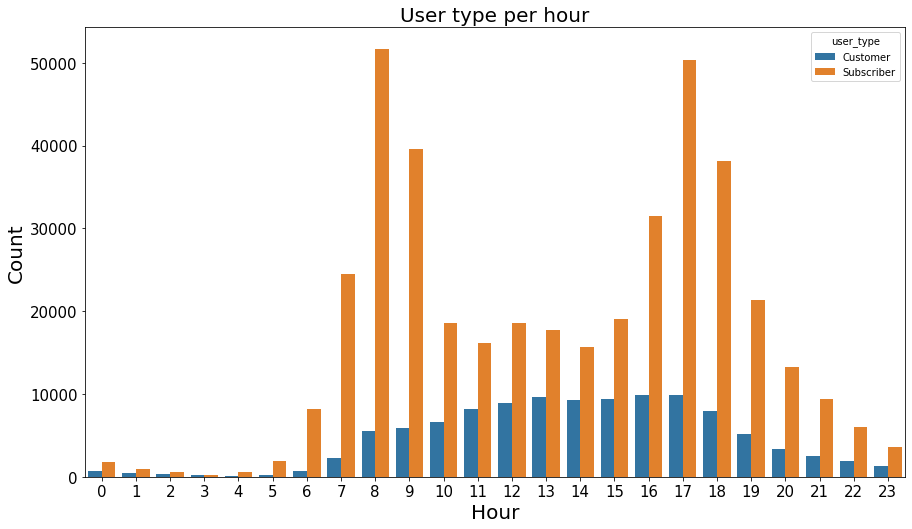

In [26]:
#size of the graph
plt.figure(figsize=[14.70, 8.27]);
#bar chart
sns.countplot(data=df_new, x='start_hour',hue='user_type');
#x axis label
plt.xlabel("Hour",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Count",size=20)
plt.yticks(size=15)
#plot label
plt.title("User type per hour",size = 20);

> from 1 AM to 3 AM the two kinds are equal

> the frequency of Customer type from 8 AM to 6 PM is almost equal

> the most frequency of Subscribers is 8-9 AM and 5-6 PM, the two intervals almost equal, i think because it is the working hours

### What is the frequency of users type per day?

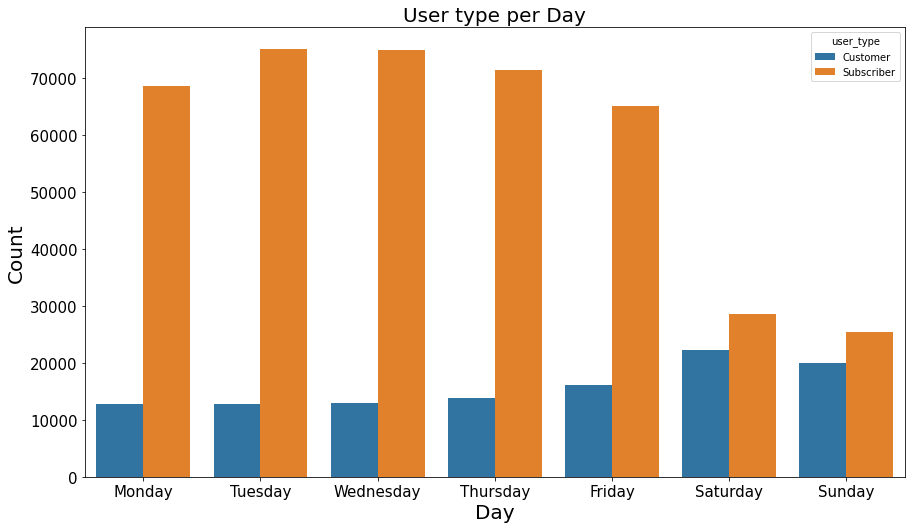

In [27]:
#size of the graph
plt.figure(figsize=[14.70, 8.27]);
#bar chart
sns.countplot(data=df_new, x='start_day_week',hue='user_type');
#x axis label
plt.xlabel("Day",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Count",size=20)
plt.yticks(size=15)
#plot label
plt.title("User type per Day",size = 20);

> the frequency of the Customer type at weekdays is almost equal, but they prefer doing trips on weekends

> the frequency of the Subscriber type at weekdays is almost equal too and their trips almost in weekdays

### What is the frequency of users type per month?

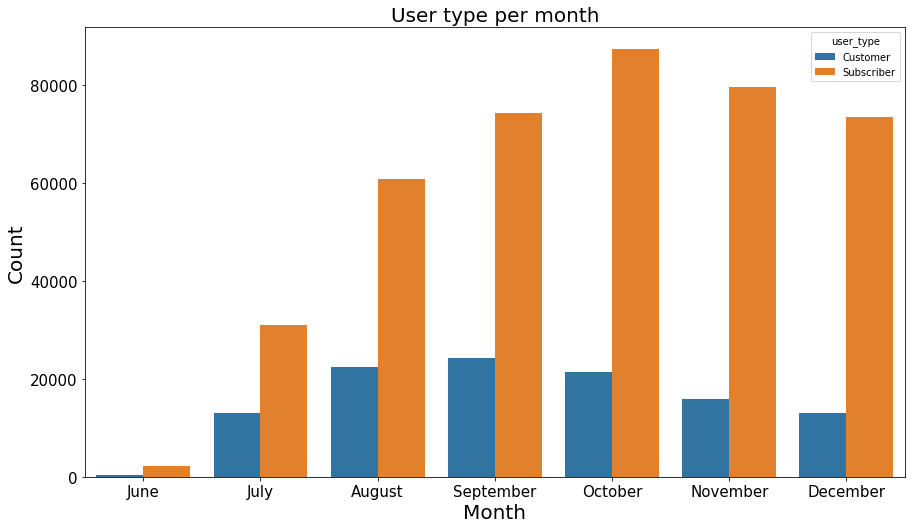

In [28]:
#size of the graph
plt.figure(figsize=[14.70, 8.27]);
#bar chart
sns.countplot(data=df_new, x='start_month',hue='user_type');
#x axis label
plt.xlabel("Month",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Count",size=20)
plt.yticks(size=15)
#plot label
plt.title("User type per month",size = 20);

> the frequency of the Customer type from August to October is almost equal, they do almost of their trips in September

> the frequency of the Subscriber type from September to December is almost equal, they do almost of their trips in October

### What is the most day during each month that most trips take place?

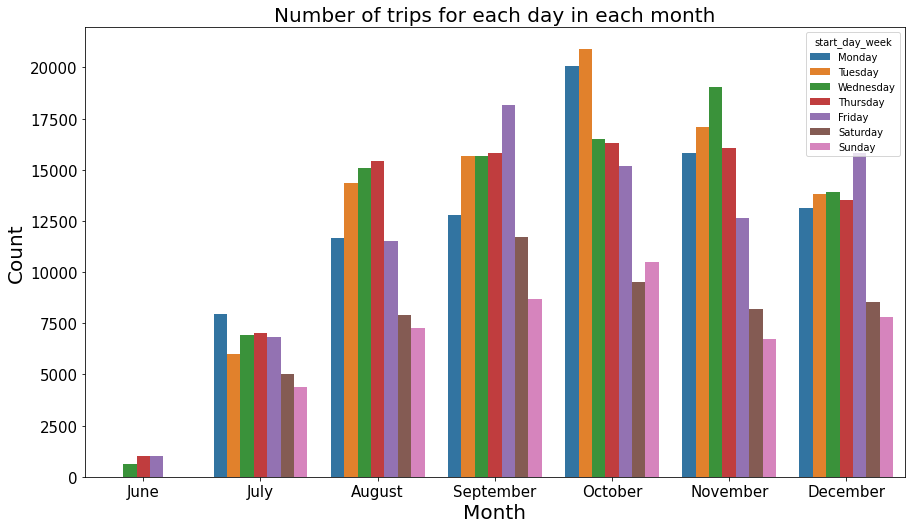

In [29]:
#size of the graph
plt.figure(figsize=[14.70, 8.27]);
#bar chart
sns.countplot(data=df_new, x='start_month',hue='start_day_week');
#x axis label
plt.xlabel("Month",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Count",size=20)
plt.yticks(size=15)
#plot label
plt.title("Number of trips for each day in each month",size = 20);

>the most common days in June are Thursday and Friday, they almost equal, and we can notice they did not ride in the other days
they just ride in these three days

>the most common days in July is Monday

>the most common days in August are Tuesday, Wednesday and Thursday they are almost equal

>the most common day in September is Friday

>the most common days in October are Monday and Tuesday they are almost equal

>the most common days in November is Wednesday

>the most common days in December is Friday


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> the average time which Customers take type is higher than the average of Subscriber, but the average for all months and days are almost equal, most of rides happen in the working hours as they go to their work and left, so that they did a lot of rides in weekdays than weekends and the most most month is October

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> we notice that the average for all station around 10, but The Embarcadero at Sansame St is 15

## Multivariate Exploration



### What is the average duration for each day in each month?

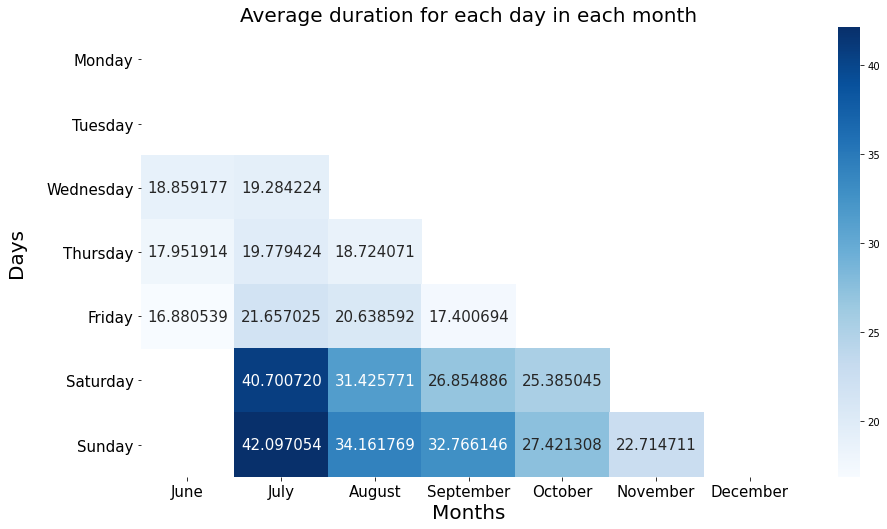

In [30]:
#group up the data by start day and start month
user_day_min = df_new.groupby(['start_day_week','start_month'])['duration_min'].mean()
user_day_min = user_day_min.reset_index(name='Average of Minutes')
#crate pivot table
user_day_min = user_day_min.pivot(index='start_day_week',columns='start_month',values='Average of Minutes')
#create a mask to plot only a half of the map
mask = np.zeros_like(user_day_min)
mask[np.triu_indices_from(mask)] = True
#size of the plot
plt.figure(figsize=[14.70, 8.27]);
#create a heatmap
sns.heatmap(user_day_min,mask=mask, annot=True, annot_kws={"fontsize":15}, fmt = 'f',cmap='Blues')
#x axis label
plt.xlabel("Months",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Days",size=20,labelpad=20)
plt.yticks(size=15,rotation=0)
#plot label
plt.title("Average duration for each day in each month",size = 20);

> in june there are no rides in 4 days: From Saturday to Tuesday

> the most average time for trips happens in July at Saturday 40.7 min, Sunday 42 min

### What is the most common hours for each user in each day?

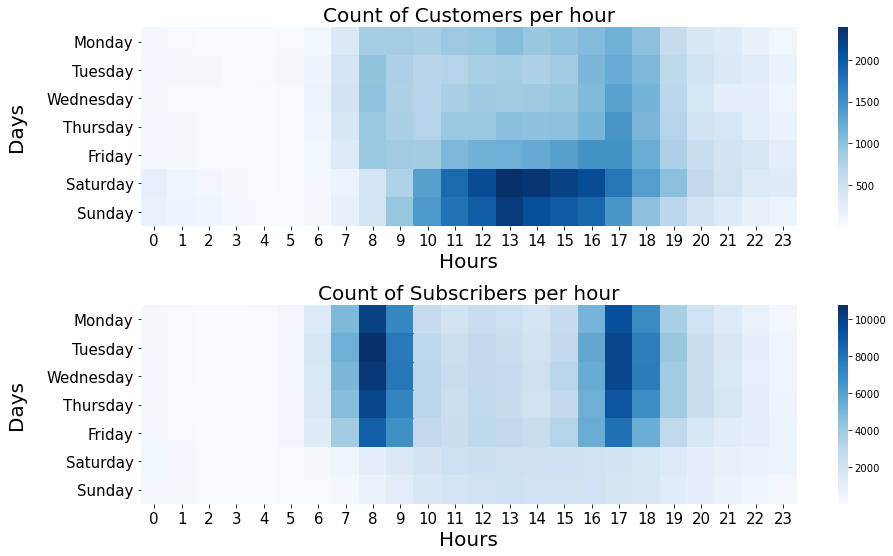

In [31]:
#pick only Customers type from the data
Customers = df_new.query('user_type=="Customer"')
#group the data by start day and start hour
Customers = Customers.groupby(['start_day_week','start_hour']).size()
Customers = Customers.reset_index(name='Count of Customers')
#create a pivot table
Customers = Customers.pivot(index='start_day_week',columns='start_hour',values='Count of Customers')
#size of the plot
plt.figure(figsize=[14.70, 8.27]);
plt.subplot(2,1,1)
#create a heatmap
sns.heatmap(Customers, cmap='Blues')
#x axis label
plt.xlabel("Hours",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Days",size=20,labelpad=20)
plt.yticks(size=15,rotation=0)
#plot label
plt.title("Count of Customers per hour",size = 20);

#pick only Subscriber type from the data
Subscribers = df_new.query('user_type=="Subscriber"')
#group the data by start day and start hour
Subscribers = Subscribers.groupby(['start_day_week','start_hour']).size()
Subscribers = Subscribers.reset_index(name='Count of Subscribers')
#create a pivot table
Subscribers = Subscribers.pivot(index='start_day_week',columns='start_hour',values='Count of Subscribers')
#create a second heatmap
plt.subplot(2,1,2)
sns.heatmap(Subscribers,cmap='Blues')
#x axis label
plt.xlabel("Hours",size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel("Days",size=20,labelpad=20)
plt.yticks(size=15,rotation=0)
#plot label
plt.title("Count of Subscribers per hour",size = 20);

plt.subplots_adjust(bottom=0.1,
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

> Customers prefer weekends afternoon hours, while Subscribers prefer weekdays specialy 8 AM and 5 PM

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> in june there are no rides in 4 days: From Saturday to Tuesday, the most average time for trips happens in July at Saturday 40.7 min, Sunday 42 min for all riders not a specific user type, Customers hire bikes at weekends may be for having fun or going for a walk, while a Subscribers hire bikes for going and leaving their job or work place in weekdays

### Were there any interesting or surprising interactions between features?

> No, all relationships were clear and convincing, as expected

### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Note!
## because this notebook for exploration i will save my cleaned dataset to use it directly in the Explanatory notebook

In [32]:
df_new.to_csv('2017-fordgobike-tripdata-cleaned.csv', index=False)